In [1]:
# load libraries for global use
#library(ggplot2)
library(WaveletComp)
#captions and myTeam parameters
DATACAPTIONVEC <- c("ID","SEASON","DATE","TEAM1","TEAM2","WON","SCORE","SHOTS","FACEOFF","TAKEAWAY","GIVEAWAY","PIM","HITS","PPG","ATTENDANCE")
MYTEAM="NYI"

In [2]:
#read summed and delta NHL data
#from datasets created using python
nhlDataSum=data.frame()
nhlDataDelta=data.frame()
SeasonVector=c(2010,2011,2012,2014,2015,2016)
NumberOfSeasons=length(SeasonVector)
for(season in SeasonVector)
{
  tableName=paste("../dataSetsNHL/dataFileNhl_",season,"_regular_sum.dat",sep="")
  nhlDataS=read.table(tableName)
  colnames(nhlDataS) <- DATACAPTIONVEC
  nhlDataSum<-rbind(nhlDataSum,nhlDataS)
  tableName=paste("../dataSetsNHL/dataFileNhl_",season,"_regular_delta.dat",sep="")
  nhlDataS=read.table(tableName)
  colnames(nhlDataS) <- DATACAPTIONVEC
  nhlDataDelta<-rbind(nhlDataDelta,nhlDataS)
}
colnames(nhlDataSum) <- DATACAPTIONVEC
colnames(nhlDataDelta) <- DATACAPTIONVEC

In [3]:
extractGamesPerDayStatistics <- function(thisSeason,fullData)
{
    #extract games from full season data.frame
    #sum up the statistics for one gameday and return the condensed dataset

    # input: 
    #      thisSeason...number for season to do the analysis
    #      fullData ... dataframe containing input data
    # output:
    #      returnDataFrame ... dataframe with numberOfGameDays x numberOfSeasons entries
  stopifnot(!missing(thisSeason))
  stopifnot(!missing(fullData))
  
  stopifnot(is.data.frame(fullData))
  stopifnot(is.numeric(thisSeason))

  dateVector=fullData$DATE
  dateVectorUnique=unique(dateVector)
    #initialize new data containers
  returnTmpDataFrame=data.frame()
  returnDataFrame=data.frame()
  currentId <- 0
  dateVec=c() 
  thisSeasonVec=c()
  gameDayIdVec=c()
    #loop over all games per date
  for (currentDate in dateVectorUnique)
  {
    #now filter for data for the specific date and season
    gamesOfThisDate <- subset(subset(fullData, SEASON==thisSeason), DATE==currentDate)
    #"games of this date"
    colIsNumericVector <- sapply(gamesOfThisDate, is.numeric)
    #now sum the game statistics up
    sumGamesOfThisDate <- colSums(gamesOfThisDate[,colIsNumericVector==TRUE],na.rm=FALSE)
    #now attach these values to a new data container
    currentId <- currentId + 1
    dateVec<-append(dateVec,currentDate)
    thisSeasonVec<-append(thisSeasonVec,thisSeason)
    gameDayIdVec<-append(gameDayIdVec,currentId)
    returnTmpDataFrame <- rbind(returnTmpDataFrame,sumGamesOfThisDate)
  }
  #now add the cols which were not numeric
  returnDataFrame=cbind(gameDayIdVec,thisSeasonVec,dateVec,"allTeams","allTeams",returnTmpDataFrame[4:13])
  return(returnDataFrame)
}

In [4]:
gamesPerDayDelta=data.frame()
gamesPerDaySum=data.frame()
for(season in SeasonVector)
{
  gamesPerDayPerSeason <- extractGamesPerDayStatistics(season,nhlDataDelta)
  colnames(gamesPerDayPerSeason) <- DATACAPTIONVEC
  gamesPerDayDelta <- rbind(gamesPerDayDelta,gamesPerDayPerSeason)
  gamesPerDayPerSeason <- extractGamesPerDayStatistics(season,nhlDataSum)
  colnames(gamesPerDayPerSeason) <- DATACAPTIONVEC
  gamesPerDaySum <- rbind(gamesPerDaySum,gamesPerDayPerSeason)
}
colnames(gamesPerDayDelta) <- DATACAPTIONVEC
colnames(gamesPerDaySum) <- DATACAPTIONVEC

In [5]:
#collect the summed data from the whole data set of summed data
matchNYIS<-subset(nhlDataSum,nhlDataSum$TEAM1==MYTEAM | nhlDataSum$TEAM2==MYTEAM)
#now get the data of differences- filter by team name
matchNYIDH<-subset(nhlDataDelta,nhlDataDelta$TEAM1==MYTEAM)
matchNYIDA<-subset(nhlDataDelta,nhlDataDelta$TEAM2==MYTEAM)
#invert away data, as data is always taken as
#value_home_team - value_away_team
matchNYIDA$SCORE=-matchNYIDA$SCORE
matchNYIDA$SHOTS=-matchNYIDA$SHOTS
matchNYIDA$FACEOFF=-matchNYIDA$FACEOFF
matchNYIDA$TAKEAWAY=-matchNYIDA$TAKEAWAY
matchNYIDA$GIVEAWAY=-matchNYIDA$GIVEAWAY
matchNYIDA$PIM=-matchNYIDA$PIM
matchNYIDA$HITS=-matchNYIDA$HITS
matchNYIDA$PPG=-matchNYIDA$PPG
#add delta data
matchNYID<-rbind(matchNYIDH,matchNYIDA)
#now order for column data then season
tmp<-matchNYID[order(matchNYID$DATE),]
matchNYIDOrdered<-tmp[order(tmp$SEASON),]
#compute the NYI values by combining delta and summed data
#cut the non-summable data - leaving only the numeric values in a matrix
matchNYIT=0.5*(matchNYIDOrdered[6:15]+matchNYIS[6:15])
#now remerge the data to give the full dataset
matchNYI=cbind(matchNYIS[1:5],matchNYIT)

As an example we plot the goals scored by the Islanders in the games over the seasons.

In [6]:

ggplot(data=matchNYI,aes(x=ID, y=SCORE, colour=SEASON)) + geom_line()


ERROR: Error in eval(expr, envir, enclos): could not find function "ggplot"


The plot is not very conclusive, indicating a high frequency behaviour over the whole range. Using the package WaveletComp we examine the structure more closely to see if there are hiding patterns.

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


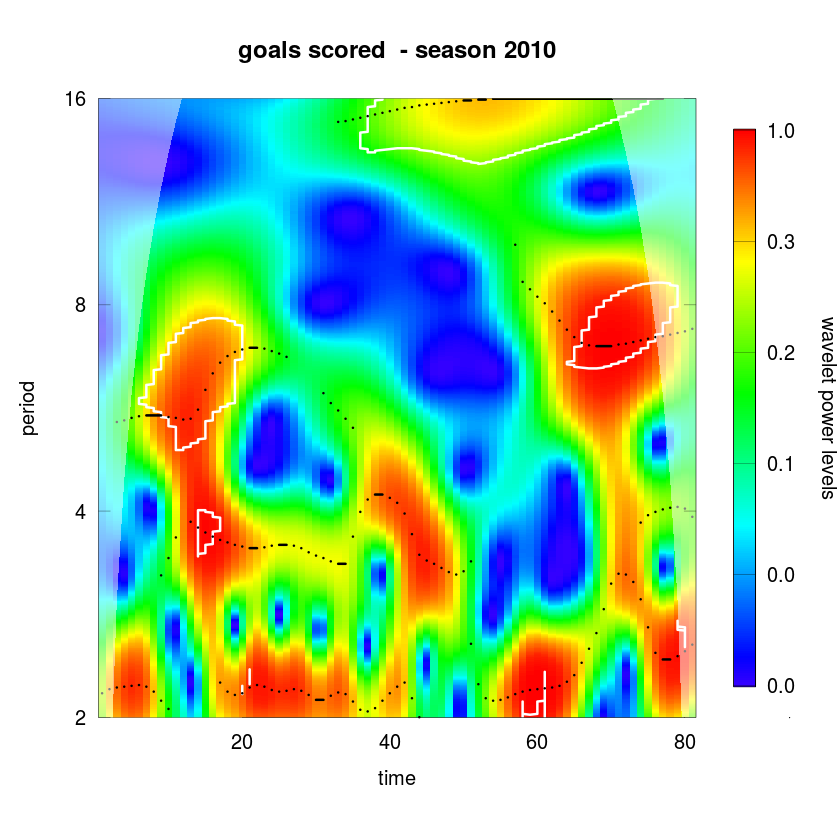

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


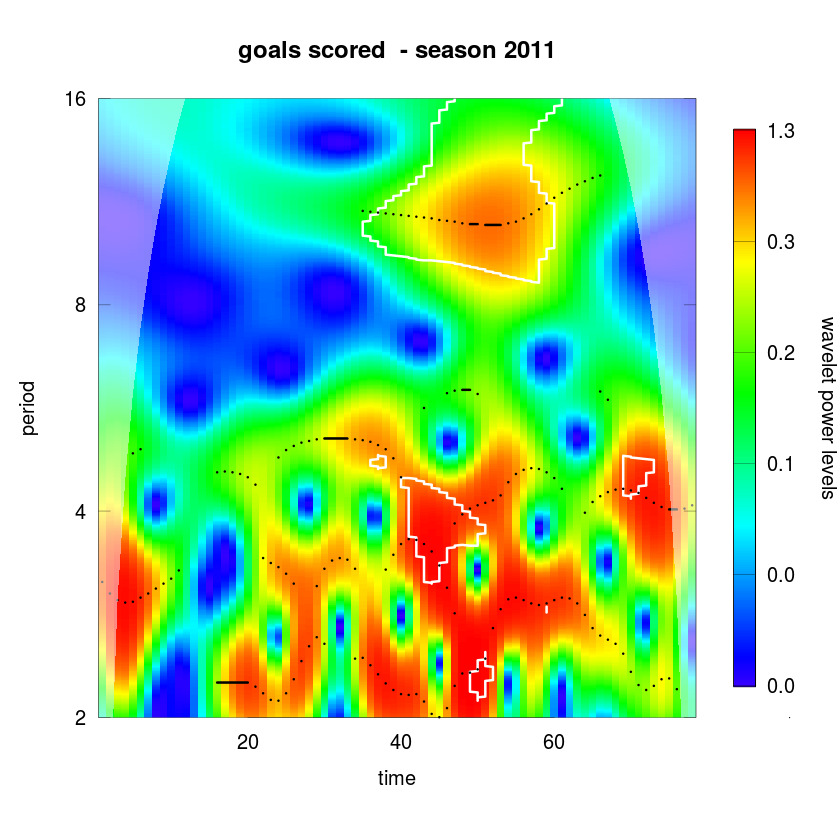

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


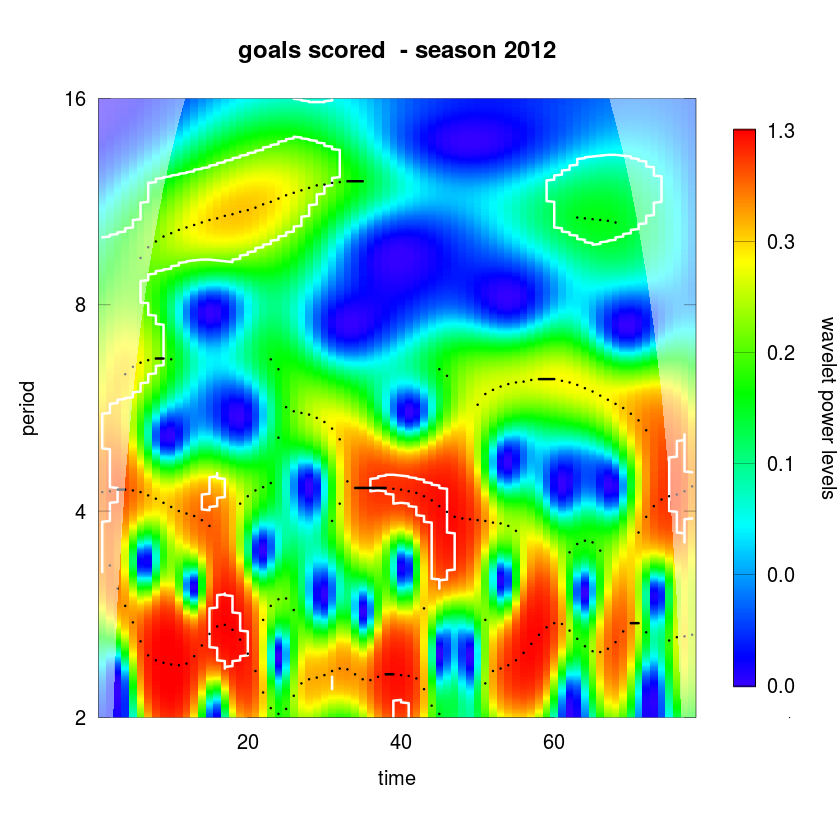

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


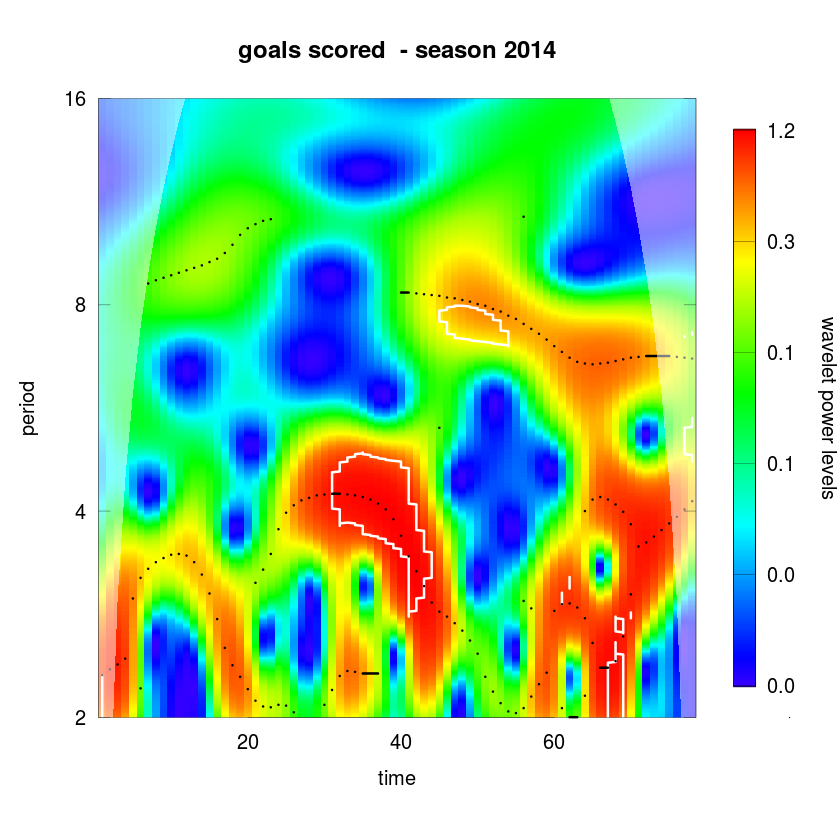

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


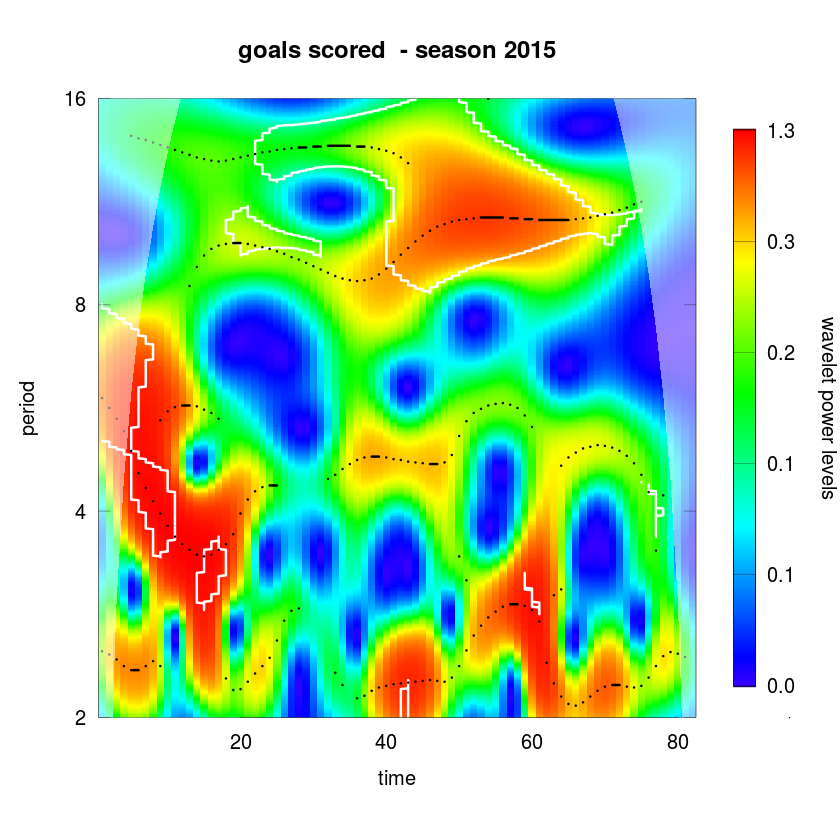

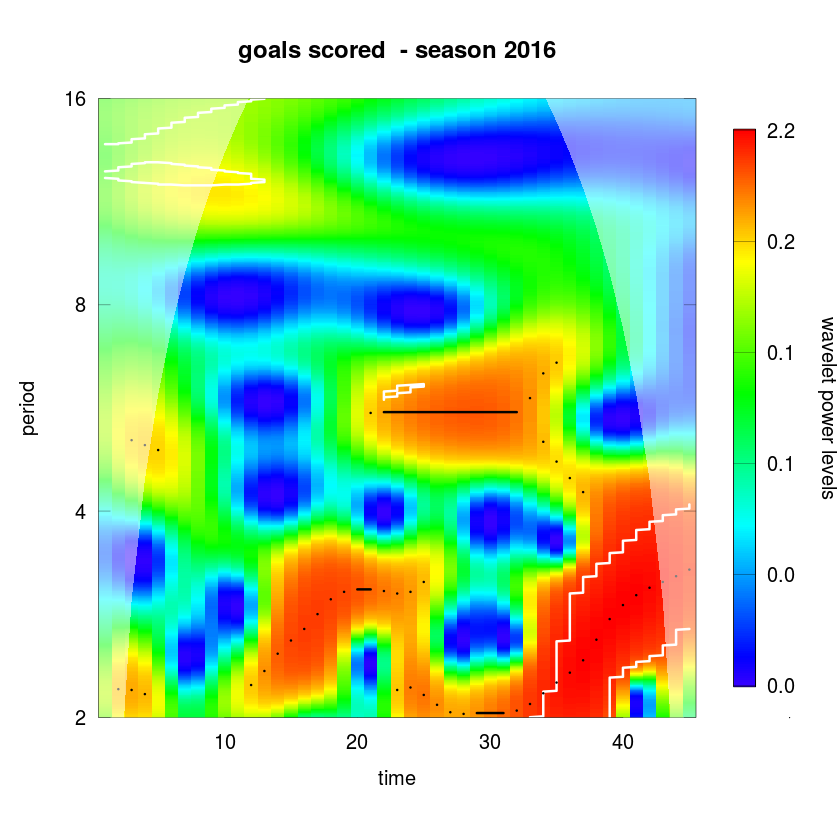

In [7]:
for(season in SeasonVector)
{
    thisSeasonData <- matchNYI[which(matchNYI$SEASON %in% season),]
    #we scale the data from 0 to 1 for every season
    Xscore <- scale(thisSeasonData$SCORE)
    #Xelement <- ppg[1:WaveLength]/hits[1:WaveLength]
    Xscore[is.na(Xscore)] <- 0
    my.data = data.frame(x=Xscore)
    my.w = analyze.wavelet(my.data, "x",
                           loess.span = 0,
                           dt = 1, dj = 1/250,
                           lowerPeriod = 2,
                           upperPeriod = 16,
                           make.pval = T, n.sim = 10)
    titleMessage <- paste("goals scored "," - season ",season,sep="")
    wt.image(my.w,main=titleMessage, color.key = "quantile", n.levels = 250,legend.params = list(lab = "wavelet power levels", mar = 4.7))
    axis(side = 1,at=c(length(Xscore)/2))
}

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 
Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


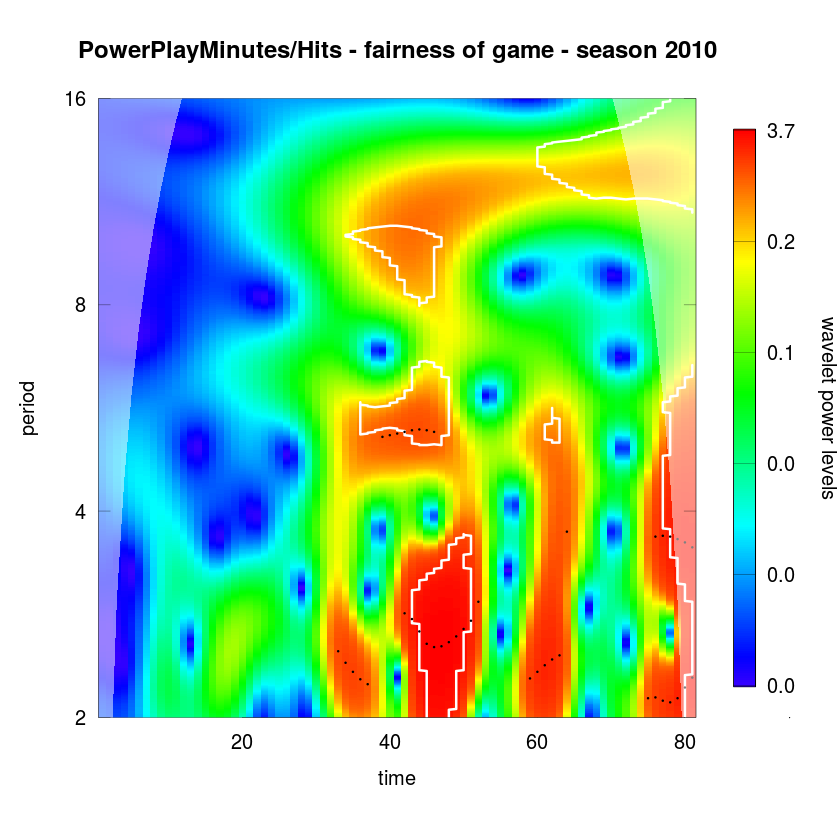

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


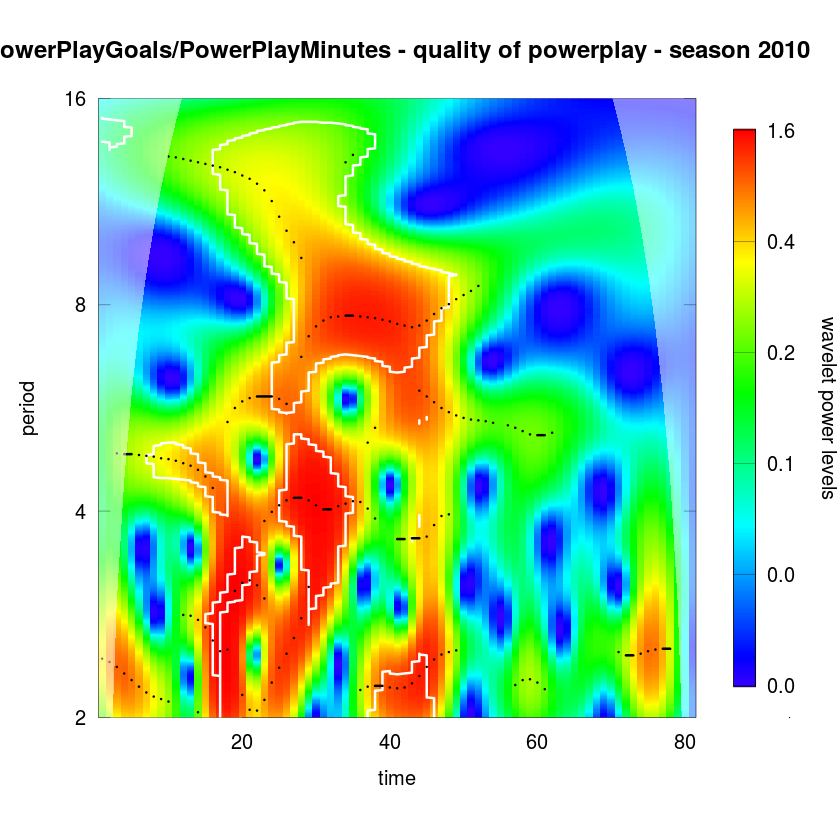

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


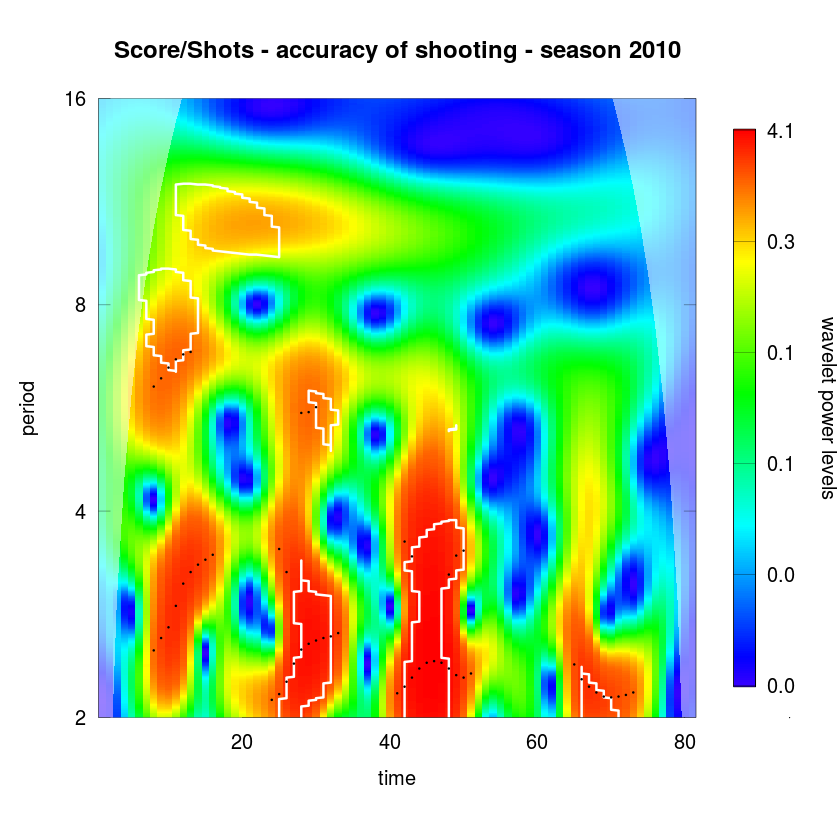

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


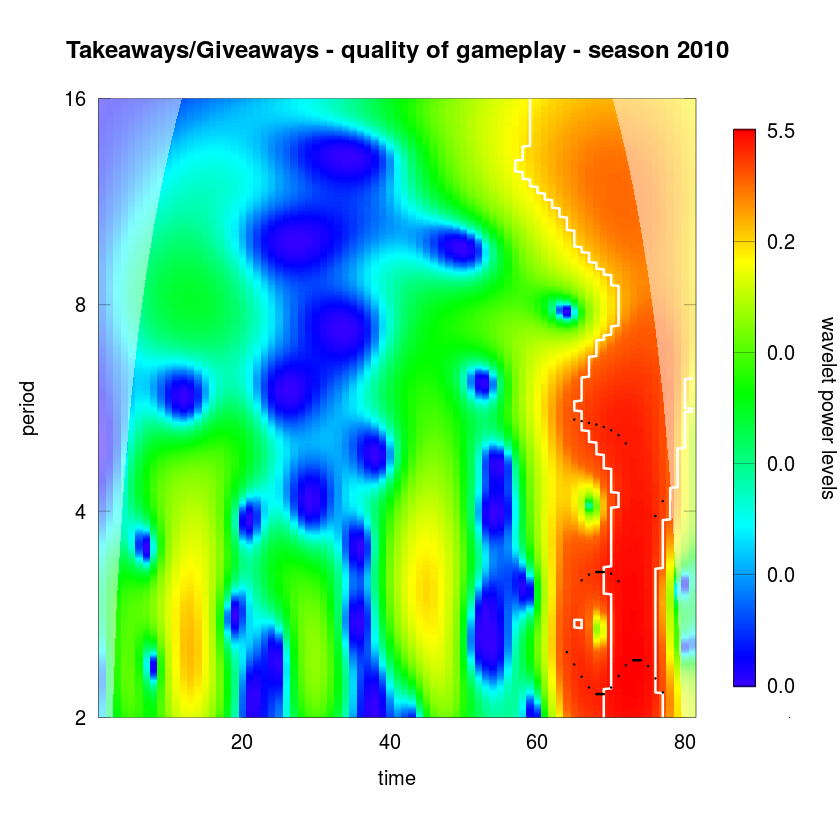

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


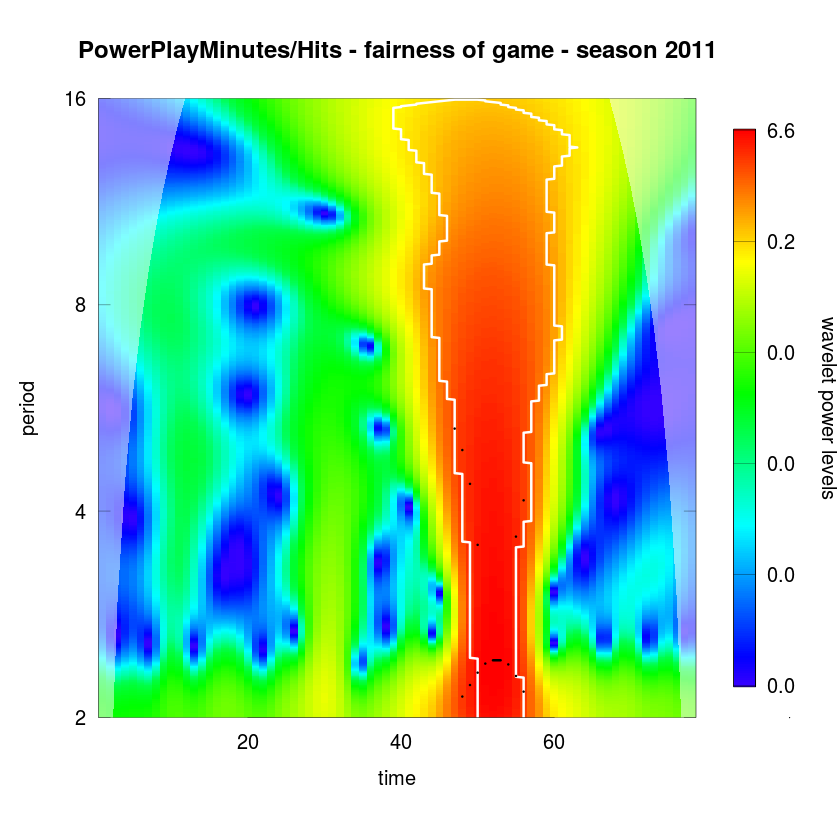

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


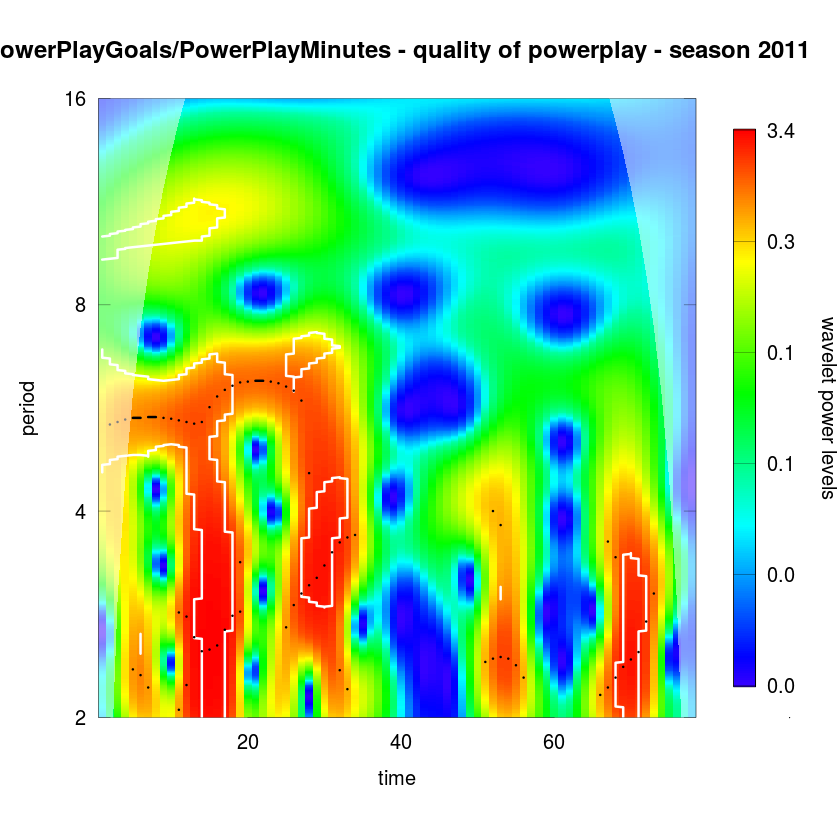

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


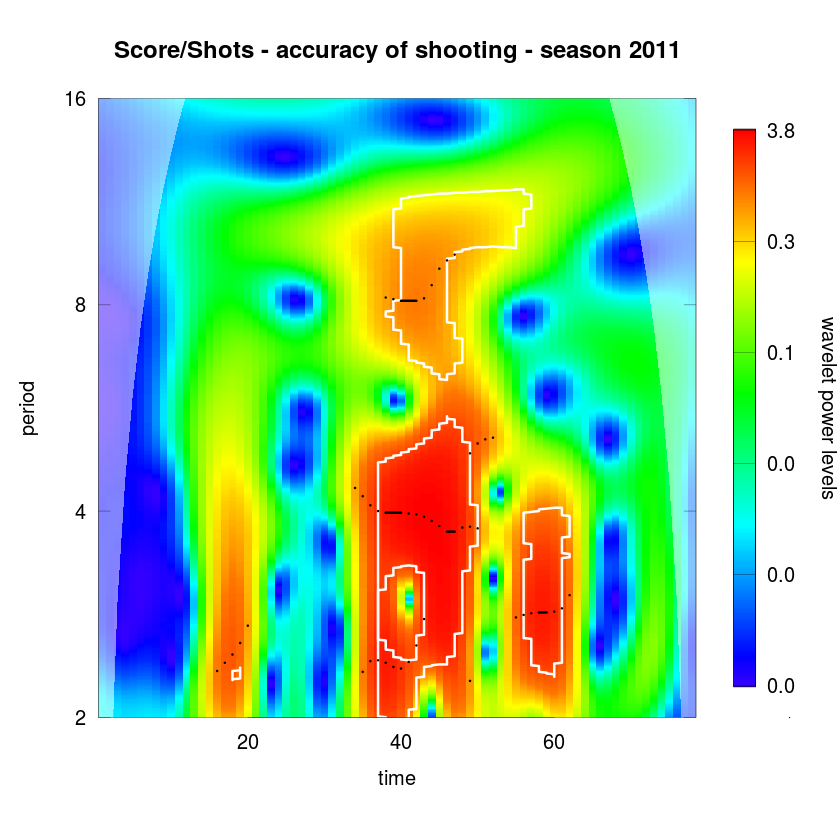

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


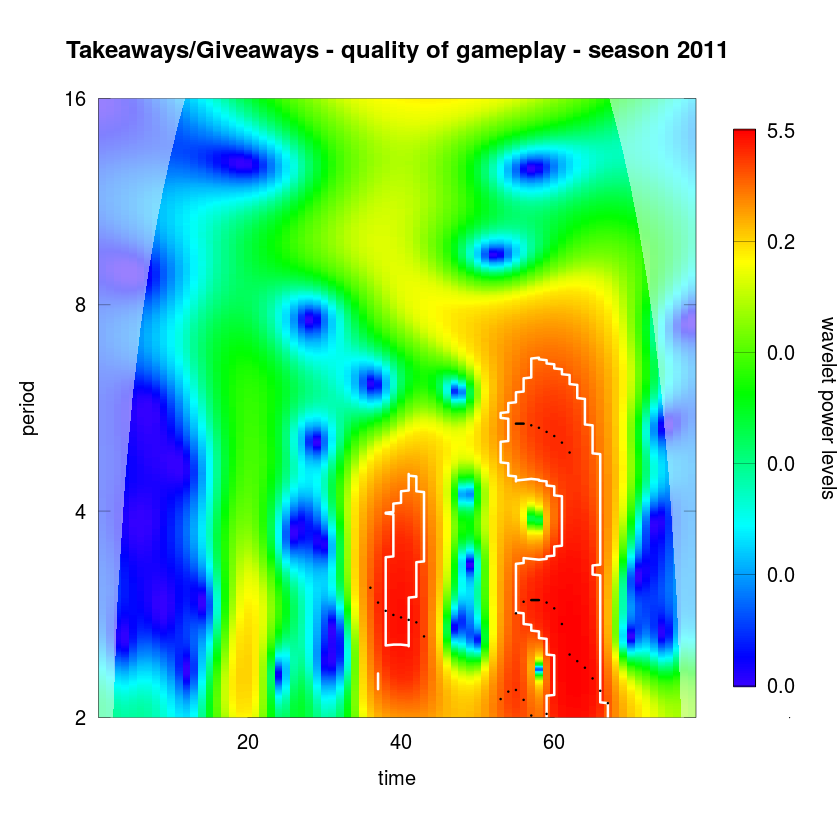

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


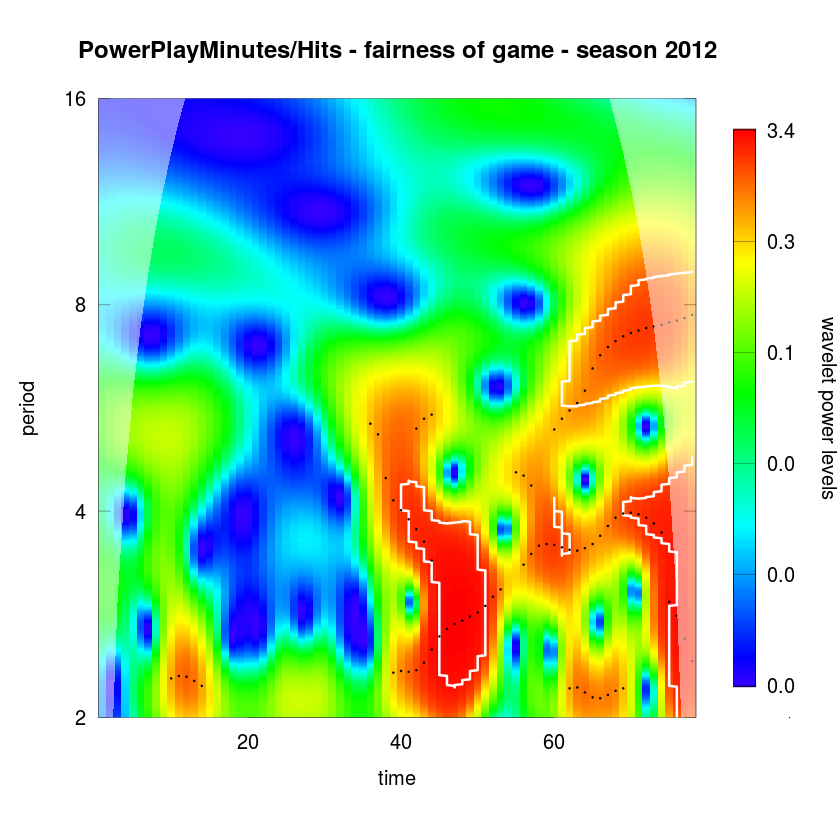

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


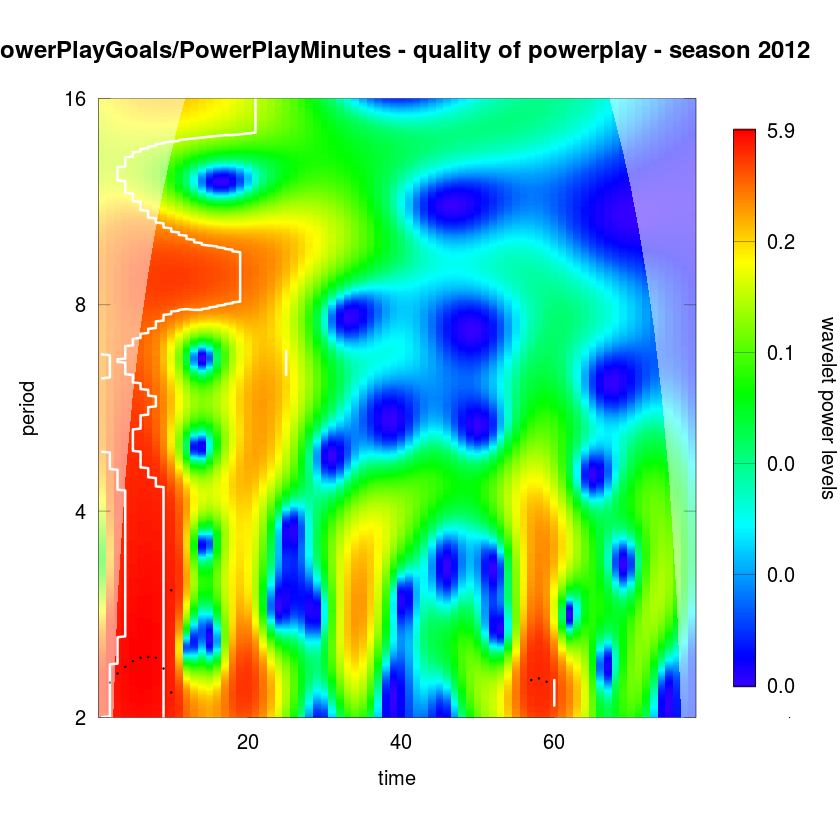

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


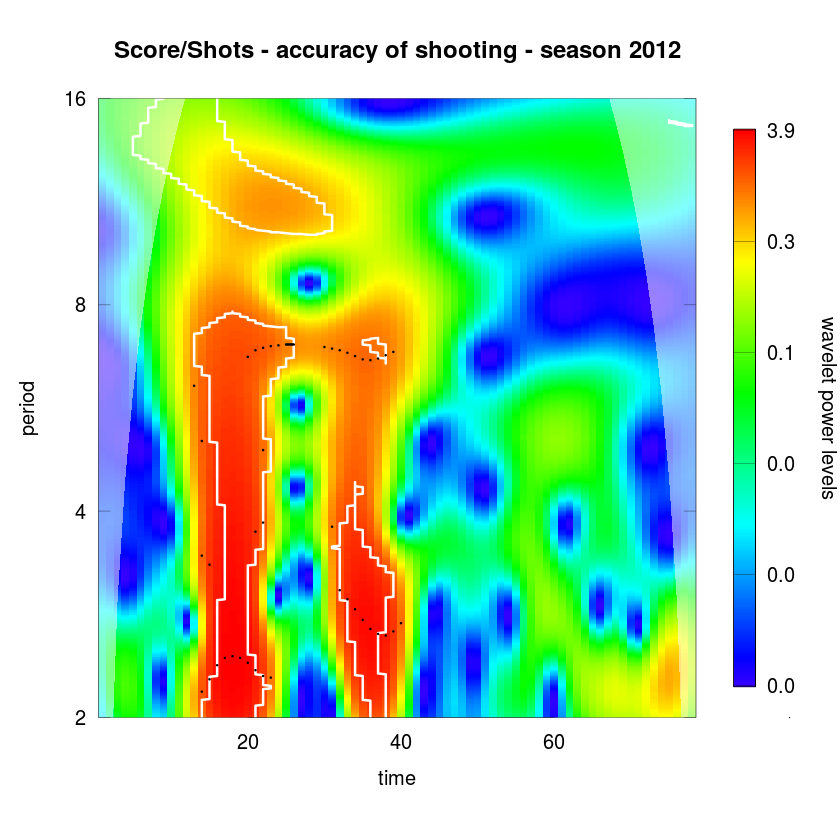

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


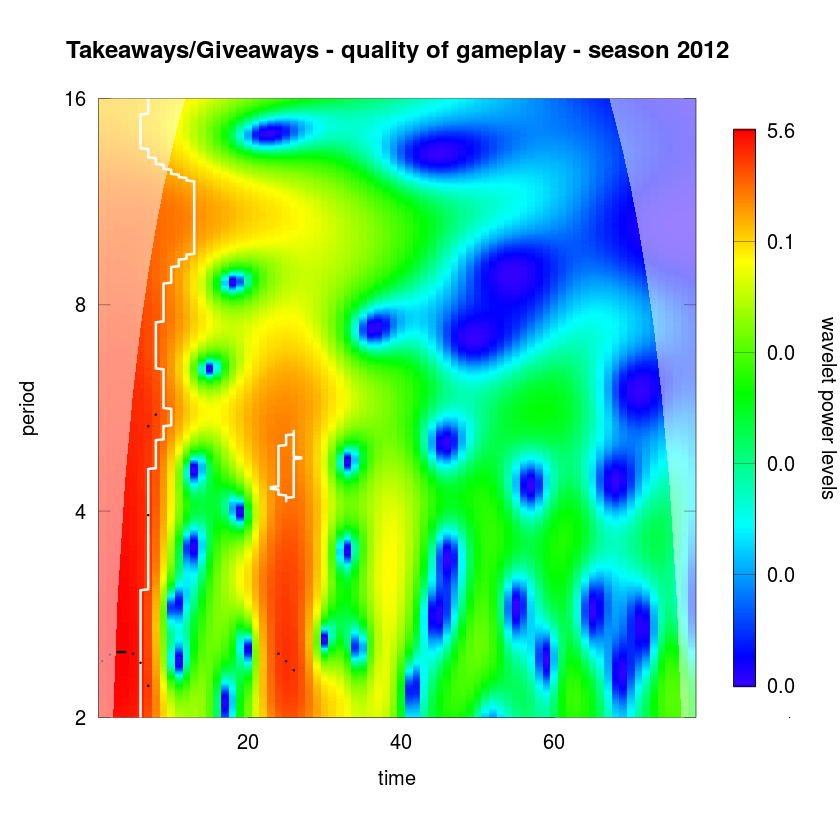

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


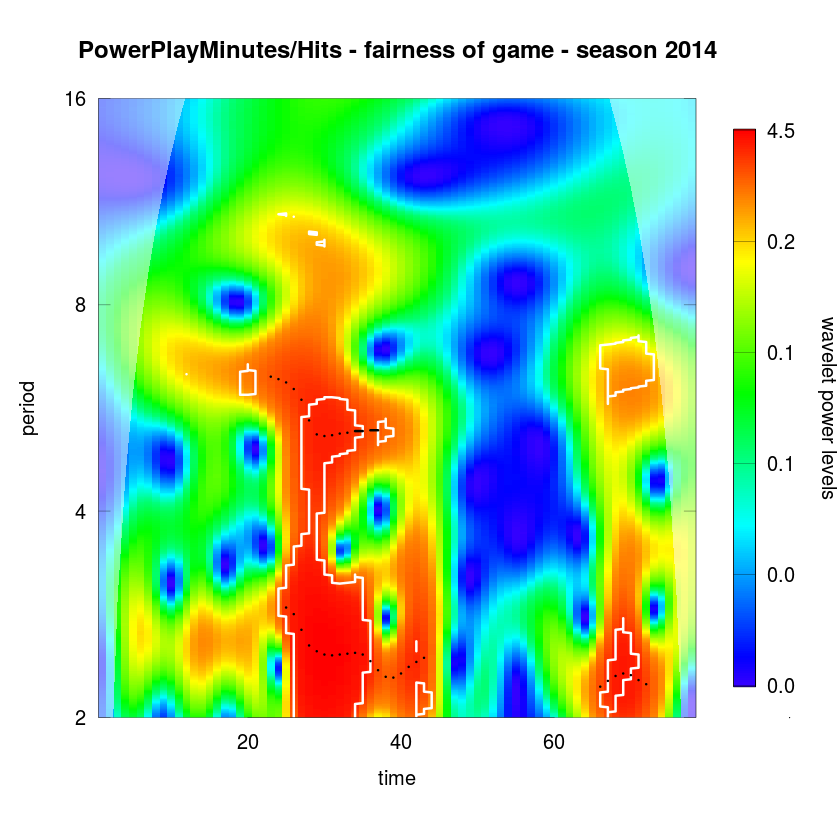

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


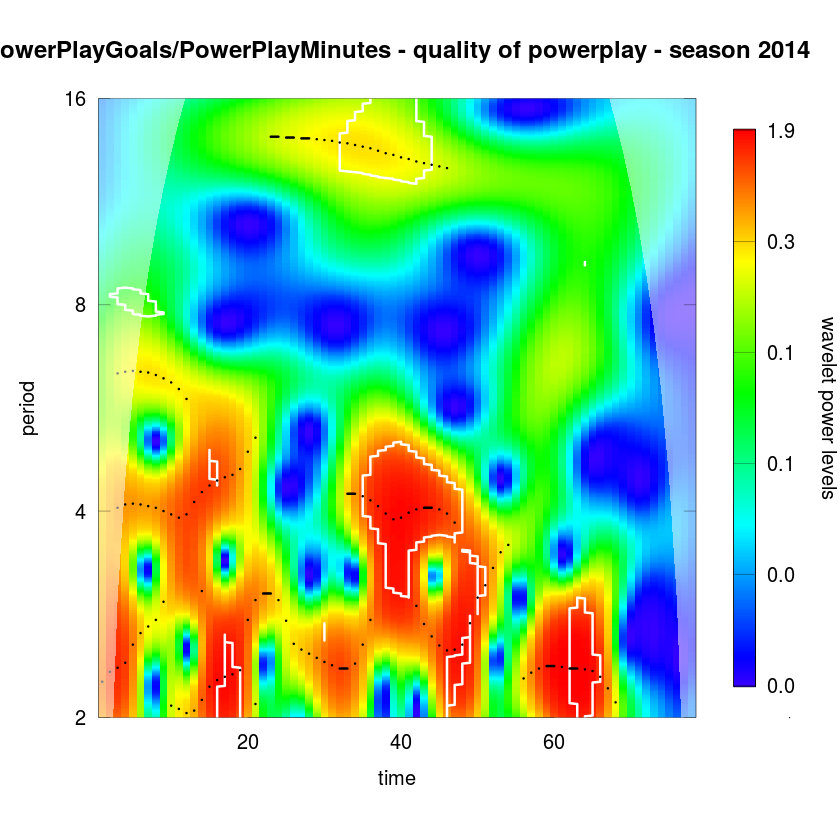

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


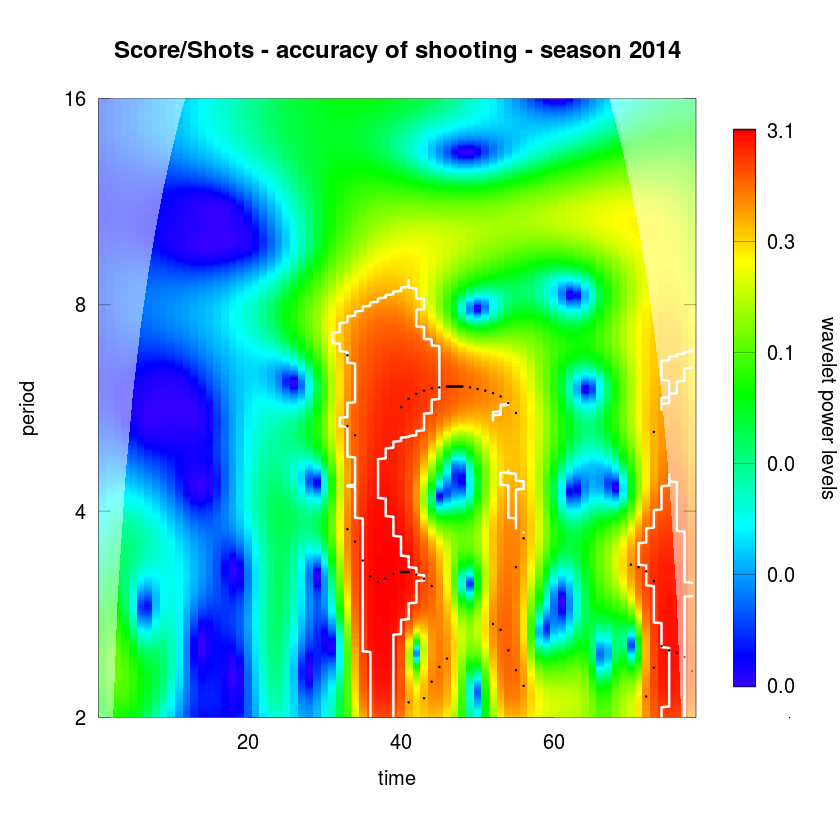

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


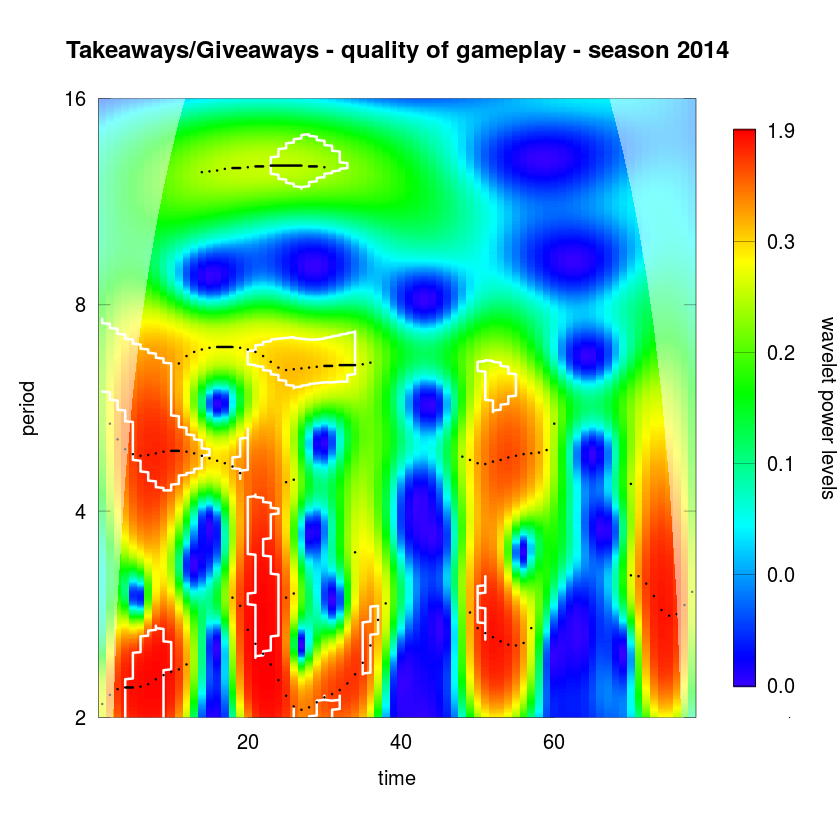

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


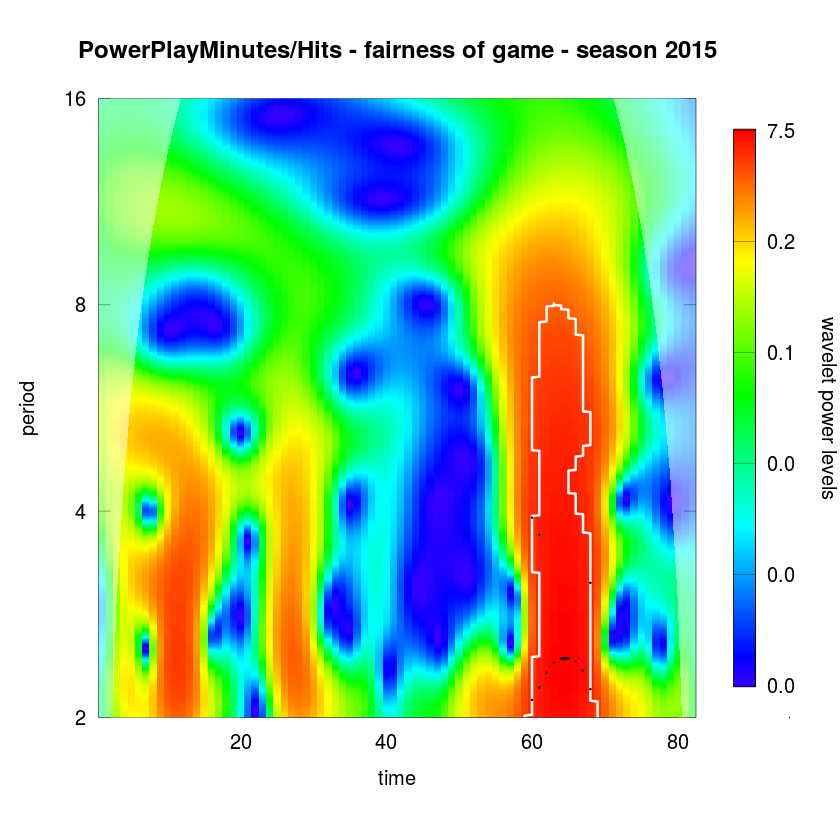

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


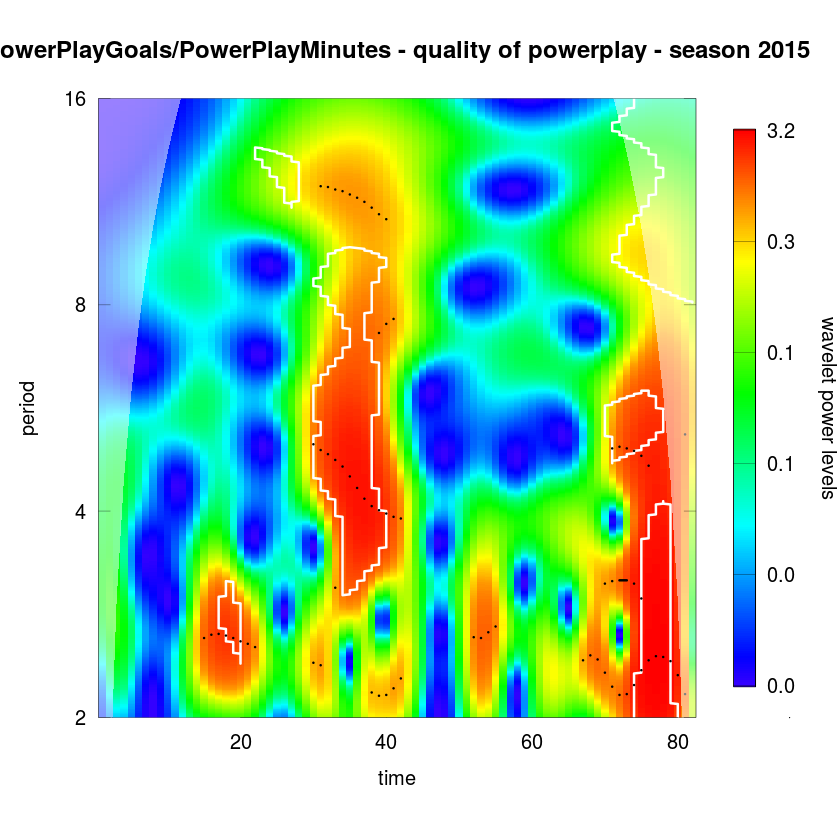

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


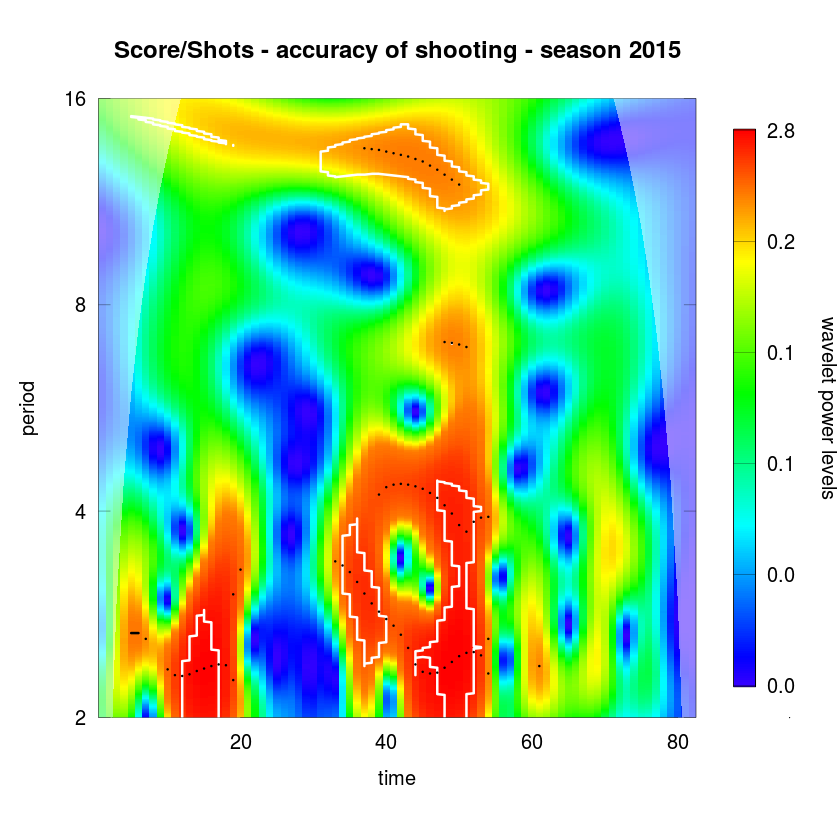

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


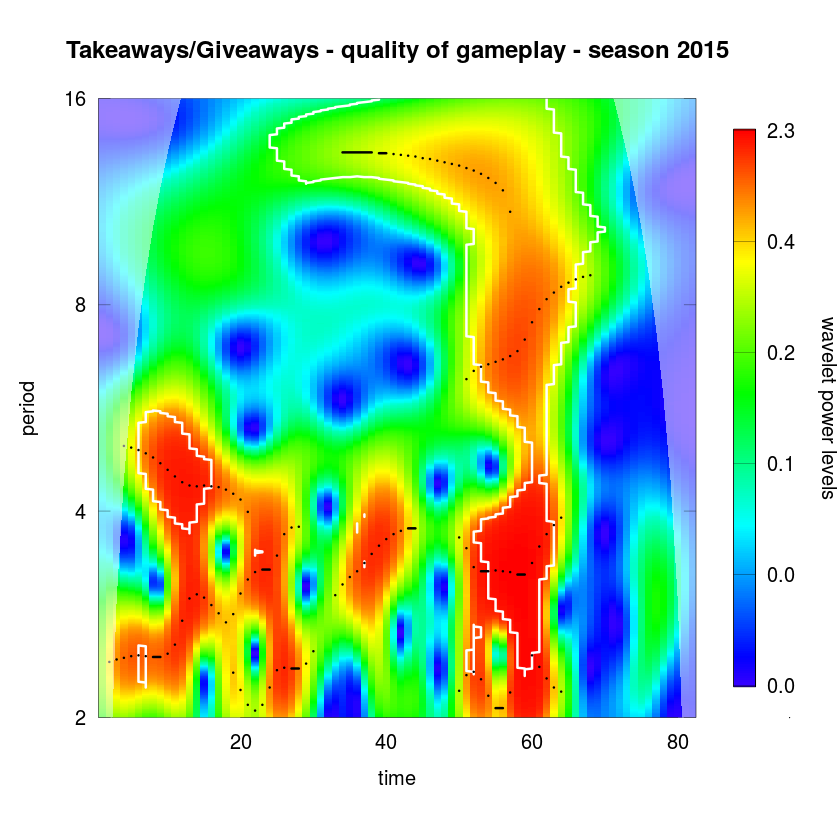

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


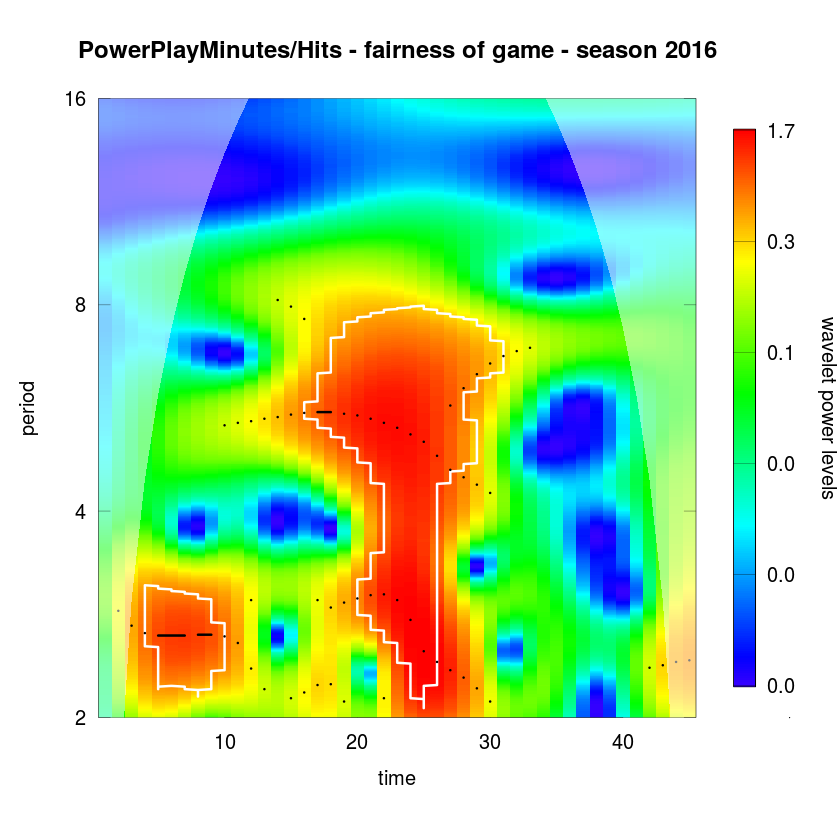

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


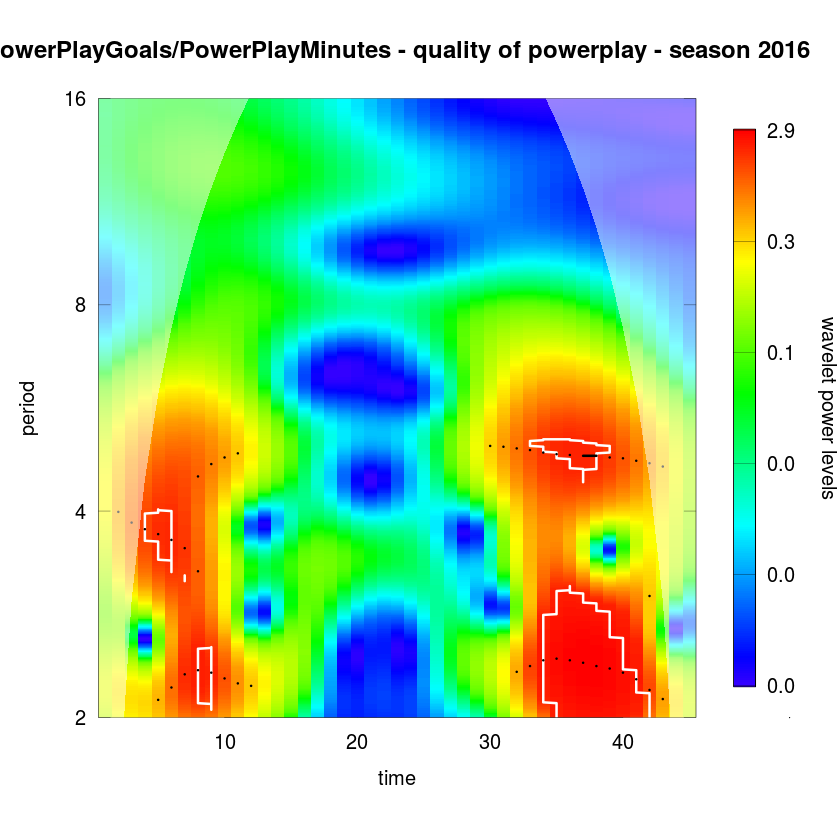

Starting wavelet transformation...
... and simulations... 
  |======================================================================| 100%
Class attributes are accessible through following names:
series loess.span dt dj Wave Phase Ampl Power Power.avg Power.pval Power.avg.pval Ridge Period Scale nc nr coi.1 coi.2 axis.1 axis.2 


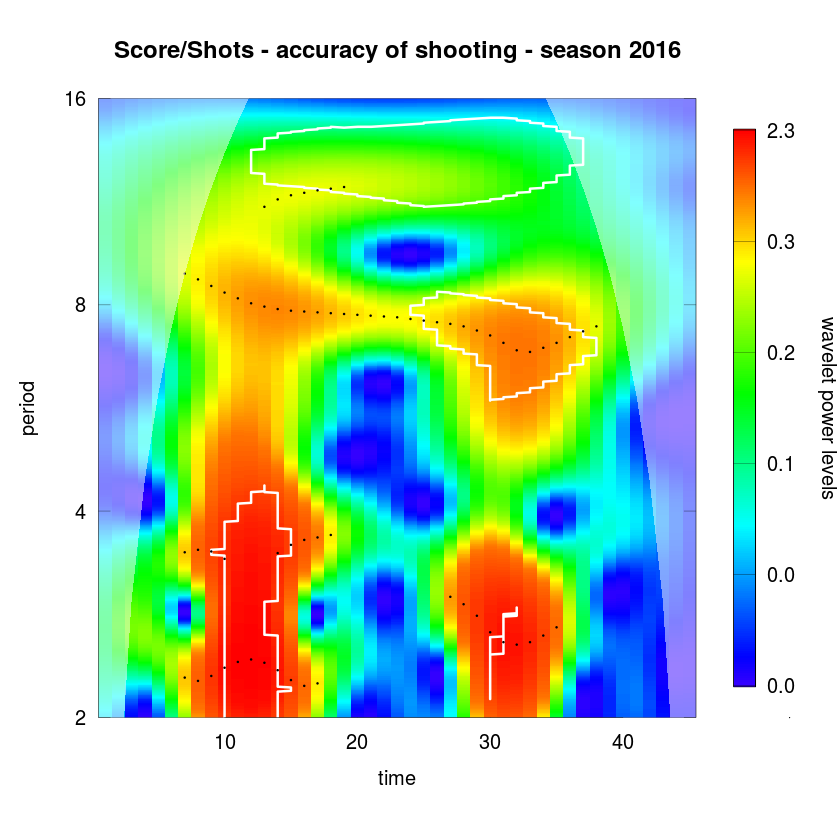

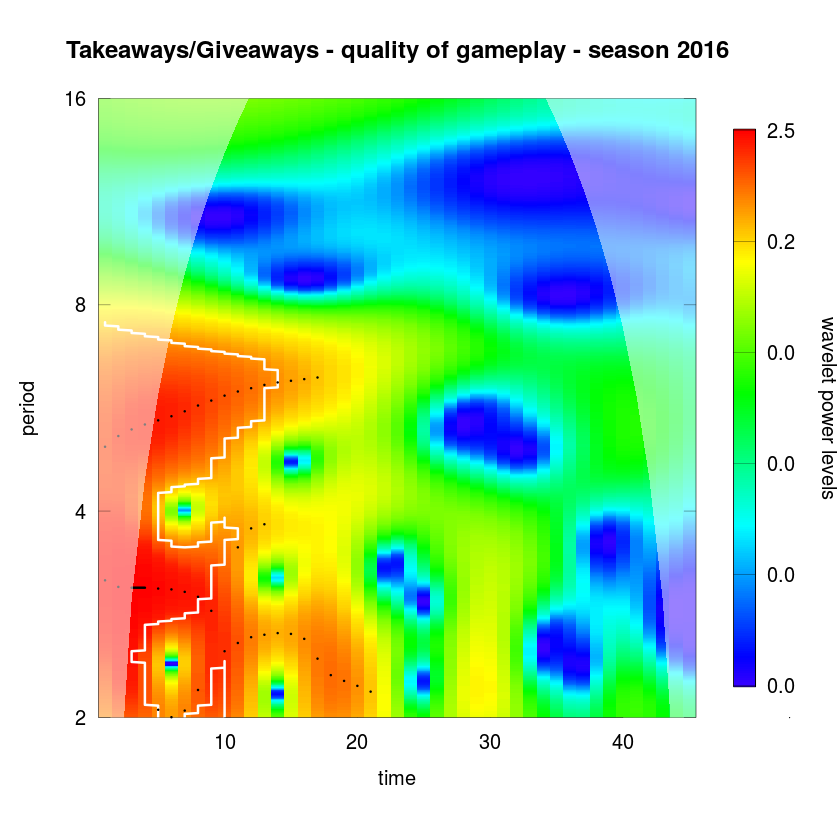

In [8]:
for(season in SeasonVector)
{
  #par(mfrow=c(2,3))
  thisSeasonData <- matchNYI[which(matchNYI$SEASON %in% season),]
  #thisSeasonData <- thisSeasonDataT[1:NumberOfGamesPerSeason]
  tmp <- thisSeasonData$PPG
  ppg=scale(tmp)
  tmp <- thisSeasonData$PIM
  ppmin=scale(tmp)
  tmp <- thisSeasonData$HITS
  hits=scale(tmp) 
  tmp <- thisSeasonData$SCORE
  score=scale(tmp)
  tmp <- thisSeasonData$SHOTS
  shots=scale(tmp) 
  tmp <- thisSeasonData$TAKEAWAY
  tkwy=scale(tmp)
  tmp <- thisSeasonData$GIVEAWAY
  gvwy=scale(tmp)  
  
  #X=c(ppg[1:WaveLength]/hits[1:WaveLength],score[1:WaveLength]/shots[1:WaveLength],tkwy[1:WaveLength]/gvwy[1:WaveLength])
  X<-list(c(ppmin/hits),c(ppg/ppmin),c(score/shots),c(tkwy/gvwy))
  Xname=list("PowerPlayMinutes/Hits - fairness of game","PowerPlayGoals/PowerPlayMinutes - quality of powerplay","Score/Shots - accuracy of shooting","Takeaways/Giveaways - quality of gameplay")
  for(i in 1:length(X))
  {
    Xelement=unlist(X[i])
    #Xelement <- ppg[1:WaveLength]/hits[1:WaveLength]
    Xelement[is.na(Xelement)] <- 0
    # do a scaling of the data before analysis
    my.data = data.frame(x=scale(Xelement))
    my.w = analyze.wavelet(my.data, "x",
                           loess.span = 0,
                           dt = 1, dj = 1/250,
                           lowerPeriod = 2,
                           upperPeriod = 16,
                           make.pval = T, n.sim = 10)
    titleMessage <- paste(Xname[i]," - season ",season,sep="")
    wt.image(my.w,main=titleMessage, color.key = "quantile", n.levels = 250,legend.params = list(lab = "wavelet power levels", mar = 4.7))
    axis(side = 1,at=c(length(Xelement)/2))
    #plotloc()
  }
  #pdf(file = "mygraph.pdf", width = 6.25, height = 4, family = "Times", pointsize = 12)
}